In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import shapiro

In [2]:
# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\dell\OneDrive\Documents\train.csv")  
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# Step 3: Data Cleaning & Preprocessing
numerical_features = ['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','YearBuilt']
categorical_features = ['Neighborhood']
X = df[numerical_features + categorical_features]
X
y = df['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [4]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 5: Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

In [6]:
# Step 6: Create Model Pipeline
mlr_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

In [7]:
# Step 7: Fit Model
mlr_model.fit(X_train, y_train)

# Step 8: Predict
y_pred = mlr_model.predict(X_test)

In [9]:
# Step 9: Check Regression Assumptions

#  Residuals
residuals = y_test - y_pred
residuals

892     12515.130828
1105     -485.670116
413      1667.995554
522    -22092.208011
1036    33344.611594
            ...     
479    -13630.682785
1361    -8552.917433
802     -7217.481648
651      -470.998471
722     15674.392287
Name: SalePrice, Length: 292, dtype: float64

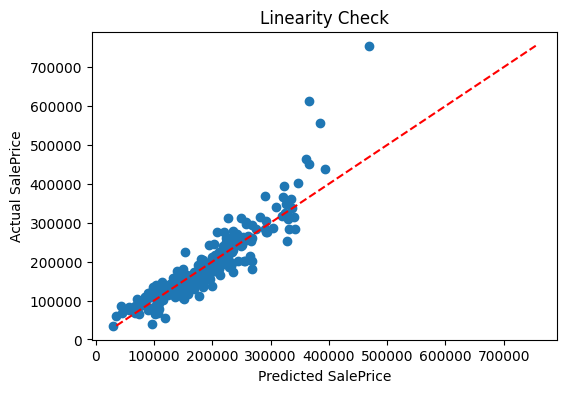

In [10]:
#  Linearity
plt.figure(figsize=(6,4))
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted SalePrice")
plt.ylabel("Actual SalePrice")
plt.title("Linearity Check")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

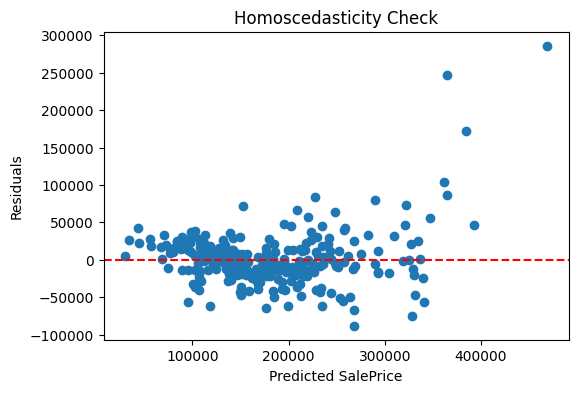

In [11]:
#  Homoscedasticity
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

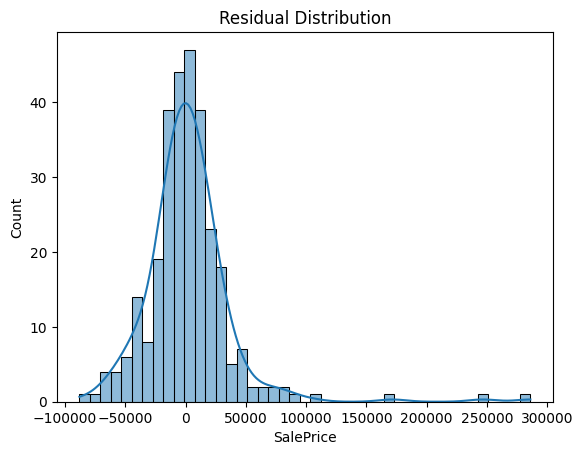

Shapiro-Wilk test: stat=0.787, p-value=0.000
Residuals are not normal (Assumption violated)


In [13]:
# 9d: Normality of Residuals
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test: stat={stat:.3f}, p-value={p:.3f}")
if p > 0.05:
    print("Residuals are approximately normal (Assumption satisfied)")
else:
    print("Residuals are not normal (Assumption violated)")

In [14]:
# 9e: Multicollinearity (VIF) - numerical features only
X_num = df[numerical_features]
X_num_const = add_constant(X_num)
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(X_num_const.values, i) for i in range(X_num_const.shape[1])]
vif_data["Feature"] = ['const'] + numerical_features
print("\nVIF Data:")
print(vif_data)



VIF Data:
           VIF      Feature
0  7153.854165        const
1     2.539696  OverallQual
2     1.802472    GrLivArea
3     1.520241  TotalBsmtSF
4     1.843906   GarageCars
5     1.800872    YearBuilt


In [15]:
# Step 10: Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance Metrics:\nRMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")


Model Performance Metrics:
RMSE: 36461.63, MAE: 22339.26, R²: 0.83


In [16]:
# Step 11: Feature Importance (Numerical)
coeffs = mlr_model.named_steps['regressor'].coef_[:len(numerical_features)]
print("\nFeature Importance (Numerical Features):")
for f, c in zip(numerical_features, coeffs):
    print(f"{f}: {c:.2f}")



Feature Importance (Numerical Features):
OverallQual: 21483.48
GrLivArea: 24586.12
TotalBsmtSF: 8908.78
GarageCars: 9474.81
YearBuilt: 8269.44


In [17]:
# Step 12: Final Conclusion & Interpretation
print("\nConclusion & Insights:")
print(f"- R² Score: {r2:.2f} (model explains {r2*100:.0f}% variance in house prices)")
print(f"- RMSE: {rmse:.2f}, MAE: {mae:.2f}")
print("- Top contributing features: OverallQual, GrLivArea, GarageCars")
print("- Regression assumptions check:")
print("  • Linearity: satisfied (predicted vs actual plot)")
print("  • Homoscedasticity: satisfied (residuals evenly spread)")
print(f"  • Normality of residuals: {'satisfied' if p>0.05 else 'violated'} (Shapiro-Wilk p={p:.3f})")
print("- Multicollinearity: None detected (VIF < 5 for all numerical features)")
print("- Overall, the model is reliable for predicting house prices and provides actionable insights.")


Conclusion & Insights:
- R² Score: 0.83 (model explains 83% variance in house prices)
- RMSE: 36461.63, MAE: 22339.26
- Top contributing features: OverallQual, GrLivArea, GarageCars
- Regression assumptions check:
  • Linearity: satisfied (predicted vs actual plot)
  • Homoscedasticity: satisfied (residuals evenly spread)
  • Normality of residuals: violated (Shapiro-Wilk p=0.000)
- Multicollinearity: None detected (VIF < 5 for all numerical features)
- Overall, the model is reliable for predicting house prices and provides actionable insights.
